<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/BIg-Data/Assignment-2/vitalfew-logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연습

#### 패키지 불러오기

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")

#### (공통)사용자 함수 

In [ ]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    #print(v_data.head()) <- Text format... 식별 불편
    # v_data.head()  <- 직접 적용 안됨

## 데이터 구성하기

In [ ]:
df_raw = pd.read_csv("SCALE불량.csv",encoding='euc-kr')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THICK           720 non-null    float64
 6   PT_WIDTH           720 non-null    int64  
 7   PT_LENGTH          720 non-null    int64  
 8   PT_WEIGHT          720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    object 
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

In [ ]:
# Data 구조 확인
fun_data_layout(df_raw)

Data 구조: (720, 21)

변수 :  Index(['PLATE_NO', 'ROLLING_DATE', 'SCALE', 'SPEC', 'STEEL_KIND', 'PT_THICK',
       'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT', 'FUR_NO', 'FUR_NO_ROW',
       'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME',
       'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')



In [ ]:
# job 범주 보기 : 기준 범주는 Mgr
df_raw["SCALE"].value_counts()

양품    489
불량    231
Name: SCALE, dtype: int64

In [ ]:
df_raw.describe()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THICK           720 non-null    float64
 6   PT_WIDTH           720 non-null    int64  
 7   PT_LENGTH          720 non-null    int64  
 8   PT_WEIGHT          720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    object 
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

## 데이터 전처리

#### 결측치 처리

In [ ]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [ ]:
# fillna: 결측치 대체 함수
# JOB 변수의 결측치는 "Other"로 대체, inplace: fillna 함수 적용 후 df_raw 데이터에 저장, False면 저장 안 함
df_raw["SCALE"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23512\600601866.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(), inplace=True)


#### 데이터 분할

0.3으로 분할 했습니당

## 로지스틱 회귀모델 및 회귀계수 검토

In [ ]:
df_raw.loc[df_raw['SCALE'] == '불량', 'SCALE'] = 1
df_raw.loc[df_raw['SCALE'] == '양품', 'SCALE'] = 0

# 문자형 -> 숫자형으로 변경
df_raw['SCALE'] = df_raw['SCALE'].astype(int)

In [ ]:
df_raw_x = df_raw.drop("SCALE",axis = 1)
df_raw_y = df_raw["SCALE"]

df_raw_y.head()

0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: int32

In [ ]:
# from_formula 함수를 이용하여 변수 역할 지정
# 분석 대상 이벤트=“1”
log_model = Logit.from_formula("""SCALE ~ PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 +  ROLLING_DESCALING """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())


Optimization terminated successfully.
         Current function value: 0.342804
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  432
Model:                          Logit   Df Residuals:                      419
Method:                           MLE   Df Model:                           12
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                  0.4512
Time:                        22:28:25   Log-Likelihood:                -148.09
converged:                       True   LL-Null:                       -269.86
Covariance Type:            nonrobust   LLR p-value:                 3.028e-45
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -145.7000     23.539     -6.190      0.000    -191.836     -99.564
PT_THICK

- PT_WIDTH, FUR_HZ_TIME, ROLLING_TEMP_T5, ROLLING_DESCALING이 유의확률 5% 하에서 유의한 회귀계수라고 판단된다.
- 불량여부에 대해 각각 -0.1%, 0.99%, 2.67%, -4.896%의 영향을 미친다.

#### 예측

In [ ]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")

Train 예측 결과 
 217    1
519    0
719    0
353    0
676    1
dtype: int32 

Confusion Matrix: 
[[269  26]
 [ 38  99]] 

Test 예측 결과 
 146    1
131    1
650    0
613    1
355    0
dtype: int32 

Confusion Matrix: 
[[163  31]
 [ 24  70]] 



#### 평가

In [ ]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["SCALE"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")
print(classification_report(df_train["SCALE"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")
print(classification_report(df_test["SCALE"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.852

Confusion Matrix: 
[[269  26]
 [ 38  99]] 

              precision    recall  f1-score   support

           0      0.876     0.912     0.894       295
           1      0.792     0.723     0.756       137

    accuracy                          0.852       432
   macro avg      0.834     0.817     0.825       432
weighted avg      0.850     0.852     0.850       432

Test 예측/분류 결과
Accuracy: 0.809

Confusion Matrix: 
[[163  31]
 [ 24  70]] 

              precision    recall  f1-score   support

           0      0.872     0.840     0.856       194
           1      0.693     0.745     0.718        94

    accuracy                          0.809       288
   macro avg      0.782     0.792     0.787       288
weighted avg      0.813     0.809     0.811       288



#### 목표변수 label 지정

In [ ]:
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print("Train 예측/분류 결과")
# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["SCALE"], y_pred_test_class, target_names=['불량', '양품'], digits=3))

print("Test 예측/분류 결과")
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["SCALE"], y_pred_test_class, target_names=['불량', '양품'], digits=3))

Train 예측/분류 결과
              precision    recall  f1-score   support

          불량      0.872     0.840     0.856       194
          양품      0.693     0.745     0.718        94

    accuracy                          0.809       288
   macro avg      0.782     0.792     0.787       288
weighted avg      0.813     0.809     0.811       288

Test 예측/분류 결과
              precision    recall  f1-score   support

          불량      0.872     0.840     0.856       194
          양품      0.693     0.745     0.718        94

    accuracy                          0.809       288
   macro avg      0.782     0.792     0.787       288
weighted avg      0.813     0.809     0.811       288



## 결론 도출

<AxesSubplot:>

C:\kangay\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


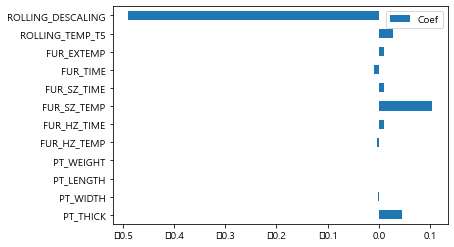

In [ ]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

#### 표준화 회귀 계수

In [ ]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char],axis = 1)
df_scaled.head()

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,ROLLING_TEMP_T5,ROLLING_DESCALING,PLATE_NO,ROLLING_DATE,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,-0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,0.000734,-0.19693,PB562774,2021-08-01:08:00:01,AB/EH32-TM,T1,1호기,1열,적용,2조
1,-0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,0.028567,-0.19693,PB562775,2021-08-01:08:07:11,AB/EH32-TM,T1,1호기,2열,적용,2조
2,-0.687308,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,-0.416748,-0.19693,PB562776,2021-08-01:08:14:21,NV-E36-TM,T8,2호기,1열,적용,3조
3,-0.687308,0.209106,1.568896,-1.095771,-0.944112,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,-0.453858,-0.19693,PB562777,2021-08-01:08:21:31,NV-E36-TM,T8,2호기,2열,적용,3조
4,-0.687308,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,-0.565186,-0.19693,PB562778,2021-08-01:08:28:41,BV-EH36-TM,T8,3호기,1열,적용,1조


In [ ]:
# BAD 데이터를 0과 1로 변환, np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["SCALE"] = np.where(df_scaled["SCALE"]> 0, 1, 0)
df_scaled.head()

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,ROLLING_TEMP_T5,ROLLING_DESCALING,PLATE_NO,ROLLING_DATE,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,0.000734,-0.19693,PB562774,2021-08-01:08:00:01,AB/EH32-TM,T1,1호기,1열,적용,2조
1,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,0.028567,-0.19693,PB562775,2021-08-01:08:07:11,AB/EH32-TM,T1,1호기,2열,적용,2조
2,0,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,-0.416748,-0.19693,PB562776,2021-08-01:08:14:21,NV-E36-TM,T8,2호기,1열,적용,3조
3,0,0.209106,1.568896,-1.095771,-0.944112,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,-0.453858,-0.19693,PB562777,2021-08-01:08:21:31,NV-E36-TM,T8,2호기,2열,적용,3조
4,0,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,-0.565186,-0.19693,PB562778,2021-08-01:08:28:41,BV-EH36-TM,T8,3호기,1열,적용,1조


In [ ]:
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""SCALE ~ PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 +  ROLLING_DESCALING""", df_scaled_train)
# 적합
scaled_log_result = scaled_log_model.fit()
# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.342804
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  432
Model:                          Logit   Df Residuals:                      419
Method:                           MLE   Df Model:                           12
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                  0.4512
Time:                        22:28:27   Log-Likelihood:                -148.09
converged:                       True   LL-Null:                       -269.86
Covariance Type:            nonrobust   LLR p-value:                 3.028e-45
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5636      0.190     -8.213      0.000      -1.937      -1.190
PT_THICK

<AxesSubplot:>

C:\kangay\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


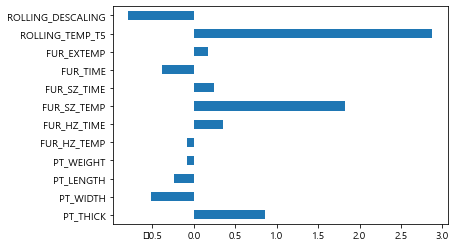

In [ ]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)